In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

input_file = "../CSV/BLS_jobs_data_cleaned.csv"

In [34]:
df = pd.read_csv(input_file)
display(df.drop(columns=["URL"]).head(5))
df.dtypes

,Typical Entry-Level Education,Work Experience in a Related Occupation,On-the-job Training,"Number of Jobs, 2019","Employment Change, 2019-29",Job_Title,Yearly_Wage,Hourly_Wage,Job_Outlook_2019-29_Rate,Job_Outlook_2019-29_Discription
0,See How to Become One,None,Long-term on-the-job training,51900,100,Portrait artists,48760.0,23.44,0.00,Little or no change
1,Bachelor's degree,5 years or more,None,165200,10400,Personnel directors,116720.0,56.11,0.06,Faster than average
2,High school diploma or equivalent,5 years or more,None,952300,-61600,Nursery managers,71160.0,34.21,-0.06,Decline
3,Master's degree,Less than 5 years,None,190500,7100,College registrars,95410.0,45.87,0.04,As fast as average
4,See How to Become One,None,Short-term on-the-job training,1643900,81000,Building carpenter helpers,36000.0,17.31,0.05,Faster than average


URL                                         object
Typical Entry-Level Education               object
Work Experience in a Related Occupation     object
On-the-job Training                         object
Number of Jobs, 2019                         int64
Employment Change, 2019-29                   int64
Job_Title                                   object
Yearly_Wage                                float64
Hourly_Wage                                float64
Job_Outlook_2019-29_Rate                   float64
Job_Outlook_2019-29_Discription             object
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f92a4e13c10>,
      dtype=object)

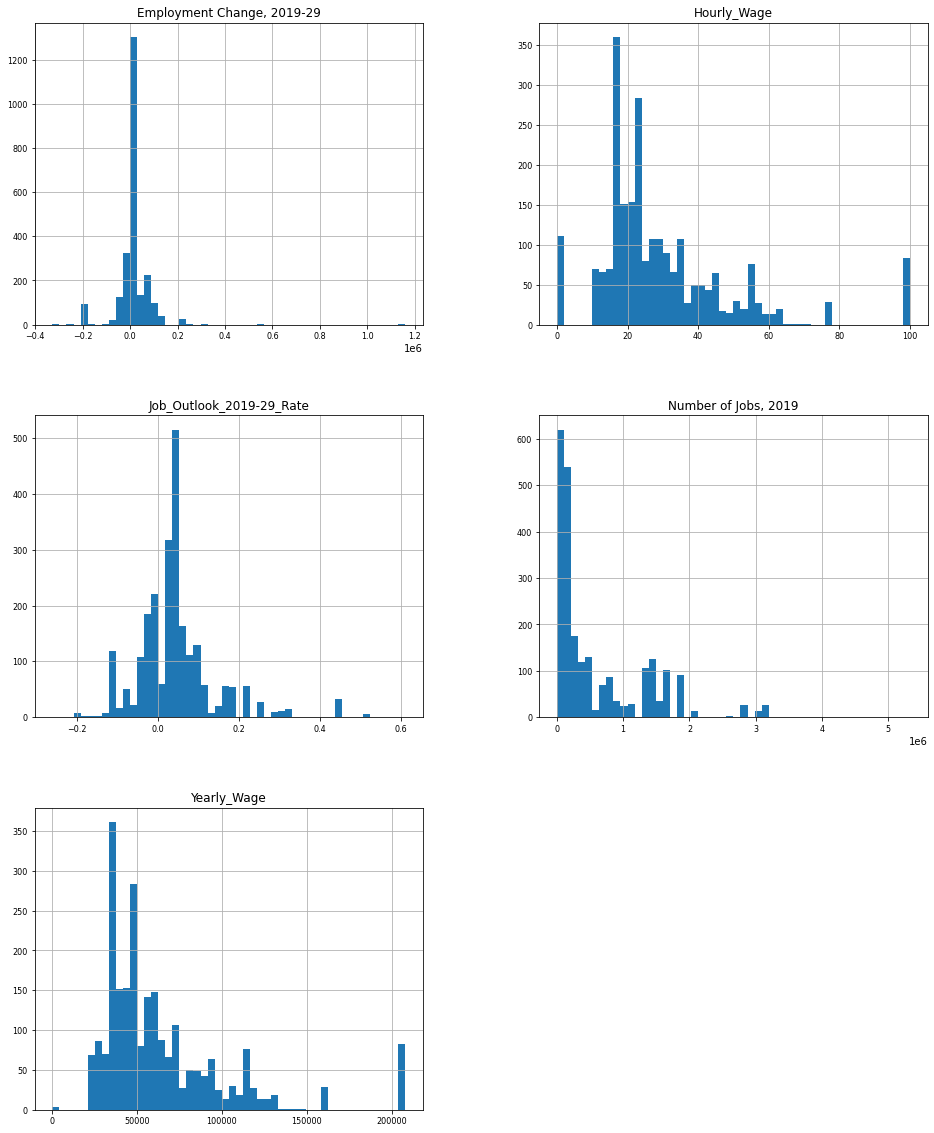

In [19]:
numerical_columns = df.select_dtypes(["int64", "float64"]).columns
df[numerical_columns].hist(figsize=(16,20), bins=50, xlabelsize=8, ylabelsize=8)

# Summary Statistics

In [20]:
net_jobs_growth = 0

req_ed = list(set( df["Typical Entry-Level Education"].tolist() ))
req_ed = ['No formal educational credential', 'High school diploma or equivalent', 'See How to Become One',
          'Some college, no degree',"Associate's degree", "Bachelor's degree", 
          'Postsecondary nondegree award', "Master's degree", 'Doctoral or professional degree']
for r in req_ed:
    mean = df["Yearly_Wage"].loc[df["Typical Entry-Level Education"]==r].mean(axis=0)
    std = df["Yearly_Wage"].loc[df["Typical Entry-Level Education"]==r].std(axis=0)
    num_jobs = df["Number of Jobs, 2019"].loc[df["Typical Entry-Level Education"]==r].sum(axis=0)
    pred_change = df["Employment Change, 2019-29"].loc[df["Typical Entry-Level Education"]==r].sum(axis=0)
    
    print("{:=^100}".format(r))
    print("Mean Yearly Wage:\t\t{:,}".format(round(mean, 2)))
    print("Std Dev Yearly Wage:\t\t{:,}".format(round(std, 2)))
    print("Number of Jobs Avail.:\t\t{:,}".format(round(num_jobs, 2)))
    print("Predicted Change in Avail.:\t{:,}".format(round(pred_change, 2)))
    
    net_jobs_growth += pred_change
    
print("\nIn 2029, BLS predicts {:,} more jobs in the US.".format(net_jobs_growth))

==================================No formal educational credential==================================
Mean Yearly Wage:		40,803.1
Std Dev Yearly Wage:		7,520.63
Number of Jobs Avail.:		39,416,700
Predicted Change in Avail.:	828,100
=================================High school diploma or equivalent==================================
Mean Yearly Wage:		41,336.83
Std Dev Yearly Wage:		13,647.97
Number of Jobs Avail.:		525,626,500
Predicted Change in Avail.:	-11,481,100
=======================================See How to Become One========================================
Mean Yearly Wage:		41,729.43
Std Dev Yearly Wage:		9,109.46
Number of Jobs Avail.:		356,587,600
Predicted Change in Avail.:	8,325,400
======================================Some college, no degree=======================================
Mean Yearly Wage:		27,190.52
Std Dev Yearly Wage:		7,052.06
Number of Jobs Avail.:		26,869,900
Predicted Change in Avail.:	815,700
=========================================Associate's degree=====

# Show Bottom 20 Jobs based on Predicted Change in Availability

In [21]:
for r in req_ed:
    print("{:=^100}".format(r))
    df_temp = df.loc[df["Typical Entry-Level Education"]==r]
    df_temp = df_temp.sort_values(by=["Employment Change, 2019-29"], ascending=True)
    display( df_temp[["Job_Title", "Yearly_Wage", "Number of Jobs, 2019", "Employment Change, 2019-29"]].head(5) )

==================================No formal educational credential==================================


,Job_Title,Yearly_Wage,"Number of Jobs, 2019","Employment Change, 2019-29"
2169,Cashiers,23650.0,3600900,-265300
1093,Retail sales workers,25440.0,4633100,-19700
156,Food preparation workers,24800.0,886700,-9500
544,Fishing and hunting workers,28530.0,36700,-2800
811,Sheet rock hangers,47360.0,146900,-300


=================================High school diploma or equivalent==================================


,Job_Title,Yearly_Wage,"Number of Jobs, 2019","Employment Change, 2019-29"
1859,Secretaries and administrative assistants,39850.0,3638800,-327400
2390,Team assembly line machine operators,33710.0,1883700,-204300
889,Steam turbine assemblers,33710.0,1883700,-204300
331,Electromechanical equipment assemblers,33710.0,1883700,-204300
952,Fiberglass machine operators,33710.0,1883700,-204300


=======================================See How to Become One========================================


,Job_Title,Yearly_Wage,"Number of Jobs, 2019","Employment Change, 2019-29"
1150,Metal and plastic machine workers,36990.0,1109400,-75800
1773,Customer service correspondence clerks,35390.0,1465800,-38000
1884,File clerks,35390.0,1465800,-38000
1895,Outpatient interviewing clerks,35390.0,1465800,-38000
361,File keepers,35390.0,1465800,-38000


======================================Some college, no degree=======================================


,Job_Title,Yearly_Wage,"Number of Jobs, 2019","Employment Change, 2019-29"
2262,"Bookkeeping, accounting, and auditing clerks",41230.00,1673600,-95400
1514,Actors,20.43,70100,2100
11,Instructional aides,27920.00,1395900,50500
2145,Paraeducators,27920.00,1395900,50500
1932,Special education instructional assistants,27920.00,1395900,50500


=========================================Associate's degree=========================================


,Job_Title,Yearly_Wage,"Number of Jobs, 2019","Employment Change, 2019-29"
1365,Electrical computer aided design and drafting ...,56830.0,200900,-7100
926,Structural drafters,56830.0,200900,-7100
973,Blueprint tracers,56830.0,200900,-7100
1075,Architectural drafters,56830.0,200900,-7100
1115,Drafting layout workers,56830.0,200900,-7100


=========================================Bachelor's degree==========================================


,Job_Title,Yearly_Wage,"Number of Jobs, 2019","Employment Change, 2019-29"
1264,Grain buyers,69600.0,526200,-37600
2318,Purchasing agents and buyers of farm products,69600.0,526200,-37600
1248,Contract administrators,69600.0,526200,-37600
323,Purchasing agents,69600.0,526200,-37600
1083,Tobacco buyers,69600.0,526200,-37600


===================================Postsecondary nondegree award====================================


,Job_Title,Yearly_Wage,"Number of Jobs, 2019","Employment Change, 2019-29"
819,Automotive service technicians and mechanics,42090.0,756600,-27800
1480,"Barbers, hairstylists, and cosmetologists",26270.0,722600,-9200
2067,Telecommunications equipment installers and re...,57910.0,215700,-5600
1392,Medical transcriptionists,33380.0,58500,-1300
2356,Court reporters,60130.0,15700,1400


==========================================Master's degree===========================================


,Job_Title,Yearly_Wage,"Number of Jobs, 2019","Employment Change, 2019-29"
1155,Survey researchers,59170.0,12200,-400
611,Sociologists,83420.0,3200,100
2105,Historians,63680.0,3500,100
1165,Epidemiologists,70990.0,8000,400
1035,Anthropologists and archeologists,63670.0,8000,400


==================================Doctoral or professional degree===================================


,Job_Title,Yearly_Wage,"Number of Jobs, 2019","Employment Change, 2019-29"
866,Pharmacists,128090.0,321700,-10500
1045,Foot doctors,126240.0,10500,0
609,DPMs,126240.0,10500,0
450,Foot specialists,126240.0,10500,0
837,Podiatrists,126240.0,10500,0


# Show Top 20 Jobs based on Predicted Change in Availability

In [22]:
for r in req_ed:
    print("{:=^100}".format(r))
    df_temp = df.loc[df["Typical Entry-Level Education"]==r]
    df_temp = df_temp.sort_values(by=["Employment Change, 2019-29"], ascending=False)
    display( df_temp[["Job_Title", "Yearly_Wage", "Number of Jobs, 2019", "Employment Change, 2019-29"]].head(5) )

==================================No formal educational credential==================================


,Job_Title,Yearly_Wage,"Number of Jobs, 2019","Employment Change, 2019-29"
834,Food and beverage serving and related workers,23000.0,5324100,552400
1885,Hand laborers and material movers,28710.0,4231600,121300
62,Janitors and building cleaners,27430.0,2374200,105600
1446,Waiters and waitresses,22890.0,2613800,97600
1680,Bartenders,23680.0,654700,38400


=================================High school diploma or equivalent==================================


,Job_Title,Yearly_Wage,"Number of Jobs, 2019","Employment Change, 2019-29"
1533,Home health aides and personal care aides,25280.0,3439700,1159500
829,Pet sitters,24990.0,350900,75500
153,Guide dog instructors,24990.0,350900,75500
825,Animal caregivers,24990.0,350900,75500
1507,Kennel aides,24990.0,350900,75500


=======================================See How to Become One========================================


,Job_Title,Yearly_Wage,"Number of Jobs, 2019","Employment Change, 2019-29"
733,Cooks,26360.0,2571700,256600
1812,Grounds maintenance workers,30890.0,1305300,130800
417,Postsecondary teachers,79540.0,1329900,121500
1771,Hospital attendants,29640.0,1579100,119500
185,Nursing care attendants,29640.0,1579100,119500


======================================Some college, no degree=======================================


,Job_Title,Yearly_Wage,"Number of Jobs, 2019","Employment Change, 2019-29"
11,Instructional aides,27920.0,1395900,50500
381,Special education teaching assistants,27920.0,1395900,50500
2145,Paraeducators,27920.0,1395900,50500
1932,Special education instructional assistants,27920.0,1395900,50500
1892,Basic skills improvement program instructional...,27920.0,1395900,50500


=========================================Associate's degree=========================================


,Job_Title,Yearly_Wage,"Number of Jobs, 2019","Employment Change, 2019-29"
1718,Paralegals and legal assistants,51740.0,337800,35300
2033,Respiratory therapists,61330.0,135800,26300
574,Veterinary technicians,35320.0,112900,18300
1224,Veterinary surgery technologists,35320.0,112900,18300
325,Laboratory animal technologists and technicians,35320.0,112900,18300


=========================================Bachelor's degree==========================================


,Job_Title,Yearly_Wage,"Number of Jobs, 2019","Employment Change, 2019-29"
1406,Software developers,107510.0,1469200,316000
196,Critical care nurses,73300.0,3096700,221900
2317,Emergency room RNs,73300.0,3096700,221900
555,Pediatric registered nurses,73300.0,3096700,221900
557,CNSs,73300.0,3096700,221900


===================================Postsecondary nondegree award====================================


,Job_Title,Yearly_Wage,"Number of Jobs, 2019","Employment Change, 2019-29"
7,Optometry assistants,34800.0,725200,139200
533,"Assistants, ophthalmic medical",34800.0,725200,139200
2185,Podiatric aides,34800.0,725200,139200
2123,Medical assistants,34800.0,725200,139200
2083,Podiatric medical assistants,34800.0,725200,139200


==========================================Master's degree===========================================


,Job_Title,Yearly_Wage,"Number of Jobs, 2019","Employment Change, 2019-29"
645,Pediatric nurse practitioners,115800.0,263400,117700
489,Adult nurse practitioners,115800.0,263400,117700
1450,Internal medicine nurse practitioners,115800.0,263400,117700
1099,Certified registered nurse anesthetists,115800.0,263400,117700
1998,Emergency medicine nurse practitioners,115800.0,263400,117700


==================================Doctoral or professional degree===================================


,Job_Title,Yearly_Wage,"Number of Jobs, 2019","Employment Change, 2019-29"
2386,Pediatric physical therapists,89440.0,258200,47000
2287,Cardiopulmonary physical therapists,89440.0,258200,47000
1043,Orthopedic physical therapists,89440.0,258200,47000
1758,Sports physical therapists,89440.0,258200,47000
722,Physical therapists,89440.0,258200,47000


# Can we predict what jobs are likely to come or go 

In [35]:
target = "Employment Change, 2019-29"
X = df.drop(columns=[target, "URL", "Job_Title"])#, "On-the-job Training", "Work Experience in a Related Occupation"])
X = X.drop(columns=["Job_Outlook_2019-29_Rate", "Job_Outlook_2019-29_Discription"])
Y = pd.DataFrame(df[target])

# display(X, Y)
display(list(set(X["Work Experience in a Related Occupation"].tolist())))

job_outlook_list = [' Decline', ' Slower than average', ' Little or no change', 
                    ' As fast as average', ' Faster than average', ' Much faster than average']

training_list = ['None', 'See How to Become One', 'Short-term on-the-job training', 
                'Moderate-term on-the-job training', 'Long-term on-the-job training',
                'Apprenticeship', 'Internship/residency']

work_exp_list = ['See How to Become One', 'Less than 5 years', 'None', '5 years or more']

job_cat = pd.CategoricalDtype(categories=job_outlook_list, ordered=True)
edu_cat = pd.CategoricalDtype(categories=req_ed, ordered=True)
trn_cat = pd.CategoricalDtype(categories=training_list, ordered=False) # Not sure if I should order or not
wrk_cat = pd.CategoricalDtype(categories=work_exp_list, ordered=False) # Not sure if I should order or not


#X["Job_Outlook_2019-29_Discription"] = X["Job_Outlook_2019-29_Discription"].astype(job_cat)
X["Typical Entry-Level Education"] = X["Typical Entry-Level Education"].astype(edu_cat)
X["On-the-job Training"] = X["On-the-job Training"].astype(trn_cat)
X["Work Experience in a Related Occupation"] = X["Work Experience in a Related Occupation"].astype(wrk_cat)

#X["Job_Outlook_2019-29_Discription"] = X["Job_Outlook_2019-29_Discription"].cat.codes
X["Typical Entry-Level Education"] = X["Typical Entry-Level Education"].cat.codes
X["On-the-job Training"] = X["On-the-job Training"].cat.codes
X["Work Experience in a Related Occupation"] = X["Work Experience in a Related Occupation"].cat.codes

display(X.head(5))

['5 years or more', 'None', 'See How to Become One', 'Less than 5 years']

,Typical Entry-Level Education,Work Experience in a Related Occupation,On-the-job Training,"Number of Jobs, 2019",Yearly_Wage,Hourly_Wage
0,2,2,4,51900,48760.0,23.44
1,5,3,0,165200,116720.0,56.11
2,1,3,0,952300,71160.0,34.21
3,7,1,0,190500,95410.0,45.87
4,2,2,2,1643900,36000.0,17.31


# Linear Regression

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=2020)
model = LinearRegression()
model = model.fit(X_train, Y_train) 
print(model.score(X_train, Y_train))
print(model.score(X_test, Y_test))

0.08752937810525707
0.05521695705414509


# Decision Tree Classifier

In [25]:
from sklearn import tree

model = tree.DecisionTreeClassifier(random_state=2020)
model = model.fit(X_train, Y_train)
print(model.score(X_test, Y_test))

# display(X,Y)

0.9039665970772442


# Decision Tree Regressor

In [26]:
from sklearn import tree

model = tree.DecisionTreeRegressor(random_state=2020)
model = model.fit(X_train, Y_train)
print(model.score(X_test, Y_test))

# display(X,Y)

0.8202205859084575


# Plotting CV score over Max Depth
DecisionTreeRegressor, CV = 10
<ul>
    <li>Max Score = depth_scores[29] = 0.6154197416807113</li>
</ul>
DecisionTreeClassifier, CV = 10
<ul>
    <li>Max Score = depth_scores[30] = 0.9113859832635984</li>
</ul>

depth_scores[30] = 0.6154197416807113
depth_scores[29] = 0.6154197416807113
depth_scores[28] = 0.615393126522864
depth_scores[27] = 0.611441345137522
depth_scores[26] = 0.6149818084626588
depth_scores[25] = 0.6157625259496567
depth_scores[24] = 0.6121818511148683
depth_scores[23] = 0.607152463682803
depth_scores[22] = 0.7137158052870279
depth_scores[21] = 0.7320476980743024
depth_scores[20] = 0.5787391463799452
depth_scores[19] = 0.4511417434043361
depth_scores[18] = 0.7402022094738098
depth_scores[17] = 0.6222588333463968
depth_scores[16] = 0.6148834853484535
depth_scores[15] = 0.7704999642983498
depth_scores[14] = 0.7641885516169792
depth_scores[13] = 0.6013351421126936
depth_scores[12] = 0.7124193298960646
depth_scores[11] = 0.4734268859326015
depth_scores[10] = 0.7130897381968888
depth_scores[9] = 0.5967664243456696
depth_scores[8] = 0.4018782409991354
depth_scores[7] = 0.6366743489043607
depth_scores[6] = 0.49840301897661476
depth_scores[5] = 0.621824527797705
depth_scores[4] = 0.

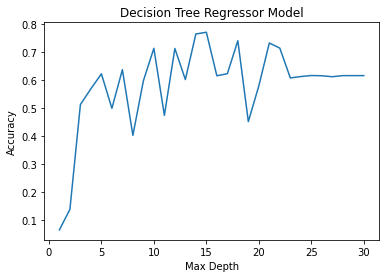

--- Total Time = 4.727666139602661 seconds ---


In [27]:
import time
from sklearn import tree
from sklearn.model_selection import cross_val_score

# Keeping track of time
start_time = time.time()

# Max Nodes
# for i in range(250, 0, -25):
#     print(i)

# Max Depth
depth_scores = {}
for i in range(30, 0, -1):
    model = tree.DecisionTreeRegressor(random_state=2020, max_depth=i)#, max_leaf_nodes = int(258/8))
    #model = tree.DecisionTreeClassifier(random_state=2020, max_depth=i)#, max_leaf_nodes = int(258/8))
    model = model.fit(X_train, Y_train)

    scores = cross_val_score(model, X, Y, cv=10)
    depth_scores[i] = sum(scores) / len(scores)

    print("depth_scores[{}] = {}".format(i, depth_scores[i]))
    
depth_scores_sorted = sorted(depth_scores.items()) # sorted by key, return a list of tuples

depth, score = zip(*depth_scores_sorted) # unpack a list of pairs into two tuples

plt.plot(depth, score)
plt.ylabel("Accuracy")
plt.xlabel("Max Depth")
plt.title("Decision Tree Regressor Model")
plt.savefig("../Images/DecisionTreeRegressor_Line_Avg-CV-10-Score_vs_Depth.png")
plt.show()
    
print("--- Total Time = %s seconds ---" % (time.time() - start_time))

# Plotting CV score over Max Depth con't

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


depth_scores[30] = 0.9113859832635984


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


depth_scores[29] = 0.9092974198047422


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


depth_scores[28] = 0.9063702928870294


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


depth_scores[27] = 0.9013563458856344


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


depth_scores[26] = 0.8963406555090655


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


depth_scores[25] = 0.8921617852161784


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


depth_scores[24] = 0.8850557880055788


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


depth_scores[23] = 0.8762778940027893


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


depth_scores[22] = 0.8687552301255229


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


depth_scores[21] = 0.855800209205021


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


depth_scores[20] = 0.8399180613668061


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


depth_scores[19] = 0.8169334030683404


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


depth_scores[18] = 0.7918532078103208
depth_scores[17] = 0.7542416317991633


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


depth_scores[16] = 0.7212343096234309
depth_scores[15] = 0.6865516039051605


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


depth_scores[14] = 0.646018131101813
depth_scores[13] = 0.5921182008368201


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


depth_scores[12] = 0.5403120641562064
depth_scores[11] = 0.48891213389121335


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


depth_scores[10] = 0.4471182008368201
depth_scores[9] = 0.40700313807531385


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


depth_scores[8] = 0.37817642956764297
depth_scores[7] = 0.35101638772663873


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


depth_scores[6] = 0.3221861924686193
depth_scores[5] = 0.2849930264993027


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


depth_scores[4] = 0.24613319386331942
depth_scores[3] = 0.18052475592747558


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


depth_scores[2] = 0.11951534170153418
depth_scores[1] = 0.07772663877266388


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


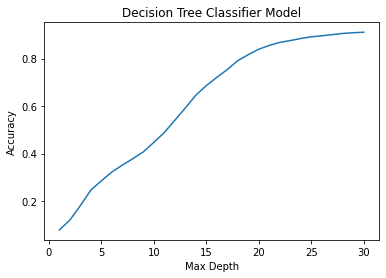

--- Total Time = 6.195064067840576 seconds ---


In [28]:
import time
from sklearn import tree
from sklearn.model_selection import cross_val_score

# Keeping track of time
start_time = time.time()

# Max Depth
depth_scores = {}
for i in range(30, 0, -1):
    model = tree.DecisionTreeClassifier(random_state=2020, max_depth=i)#, max_leaf_nodes = int(258/8))
    model = model.fit(X_train, Y_train)

    scores = cross_val_score(model, X, Y, cv=10)
    depth_scores[i] = sum(scores) / len(scores)

    print("depth_scores[{}] = {}".format(i, depth_scores[i]))
    
depth_scores_sorted = sorted(depth_scores.items()) # sorted by key, return a list of tuples

depth, score = zip(*depth_scores_sorted) # unpack a list of pairs into two tuples

plt.plot(depth, score)
plt.ylabel("Accuracy")
plt.xlabel("Max Depth")
plt.title("Decision Tree Classifier Model")
plt.savefig("../Images/DecisionTreeClassifier_Line_Avg-CV-10-Score_vs_Depth.png")
plt.show()    

print("--- Total Time = %s seconds ---" % (time.time() - start_time))

# Plot DecisionTreeRegressor

Score (Unseen Data)	 0.8202205859084575
Depth			 26
Num leaves		 271
CV=5 scores		 [ 0.95254725  0.94775939  0.95680295  0.67626576 -0.42960235  0.81461673
  0.25202854  0.86974545  0.95751038  0.15652332]
Avg			 0.6154197416807113


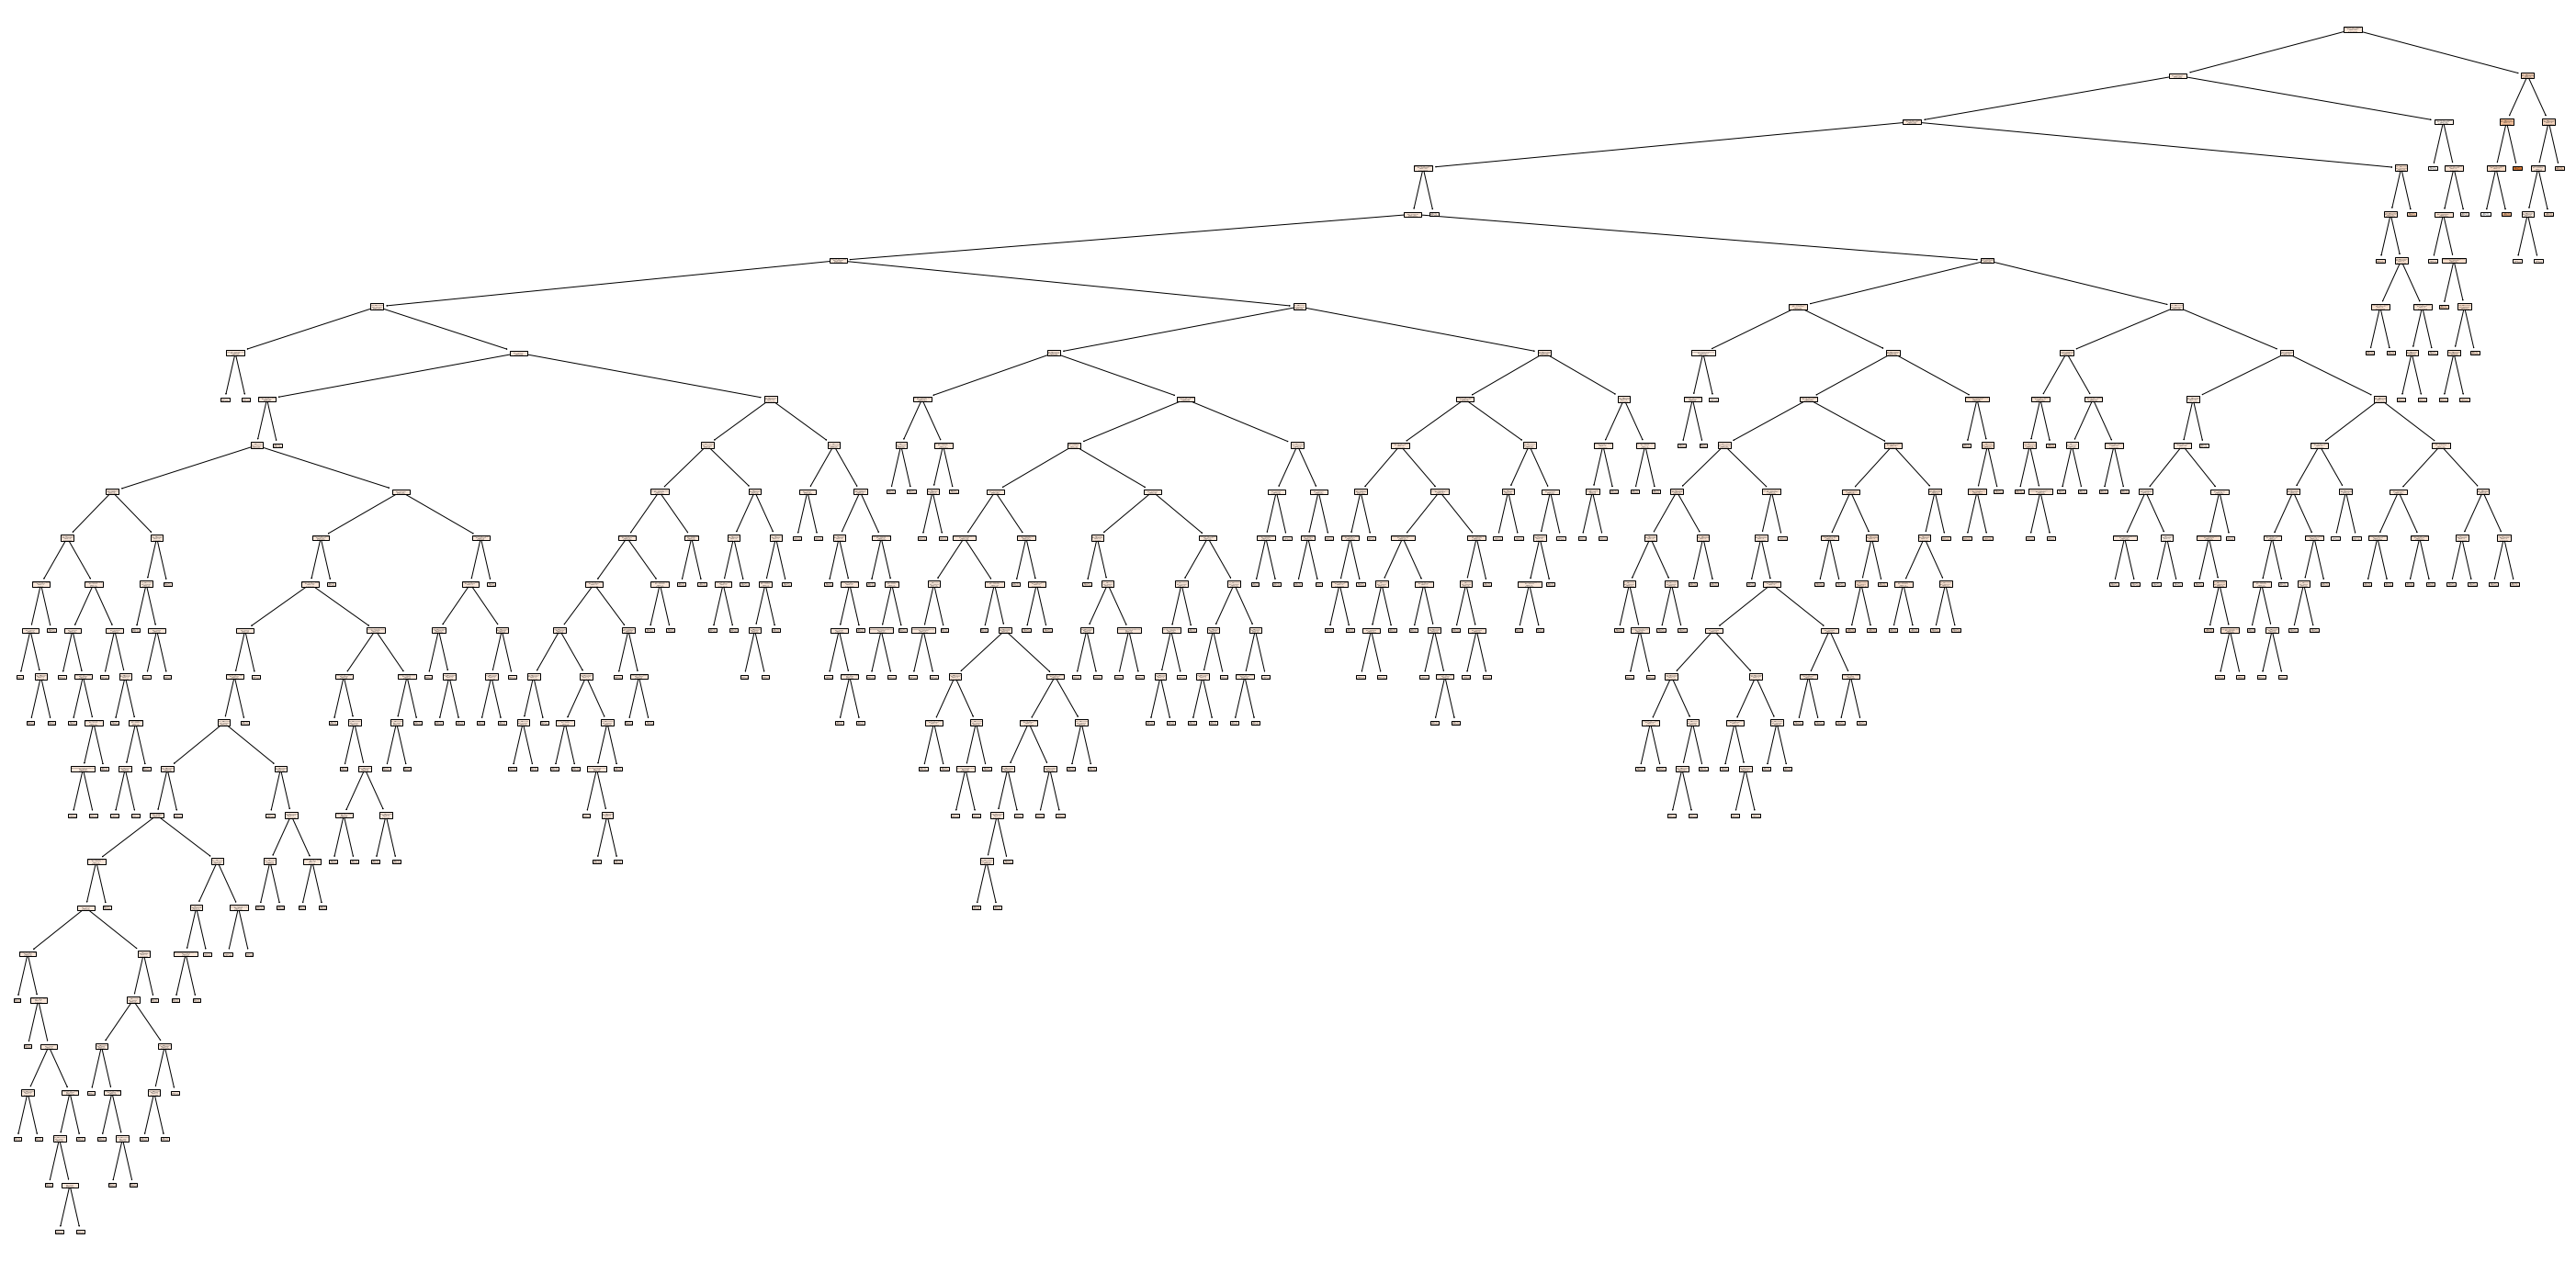

--- Graph Creation = 30.238319158554077 seconds ---
--- Total Time = 30.468056201934814 seconds ---


In [29]:
t_start_time = time.time()

model = tree.DecisionTreeRegressor(random_state=2020)#, max_leaf_nodes = len(X.columns))
model = model.fit(X_train, Y_train)
print("Score (Unseen Data)\t", model.score(X_test, Y_test))
print("Depth\t\t\t", model.get_depth())
print("Num leaves\t\t", model.get_n_leaves())
scores = cross_val_score(model, X, Y, cv=10)
print("CV=5 scores\t\t", scores)
print("Avg\t\t\t", sum(scores) / len(scores))

g_start_time = time.time()

fig = plt.figure(figsize= (50, 25))
tree.plot_tree(model,
                   feature_names= X.columns,
                   filled=True)
plt.savefig("../Images/DecisionTreeRegressor_Tree_Plot_Depth_{}.png".format(model.get_depth()))
plt.show()

print("--- Graph Creation = %s seconds ---" % (time.time() - g_start_time))
print("--- Total Time = %s seconds ---" % (time.time() - t_start_time))

# display(X)

# Plot DecisionTreeClassifier

Score (Unseen Data)	 0.9039665970772442
Depth			 34
Num leaves		 273


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


CV=5 scores		 [0.925      0.94166667 0.92083333 0.90376569 0.88284519 0.92468619
 0.89121339 0.89121339 0.92050209 0.94142259]
Avg			 0.9143148535564855


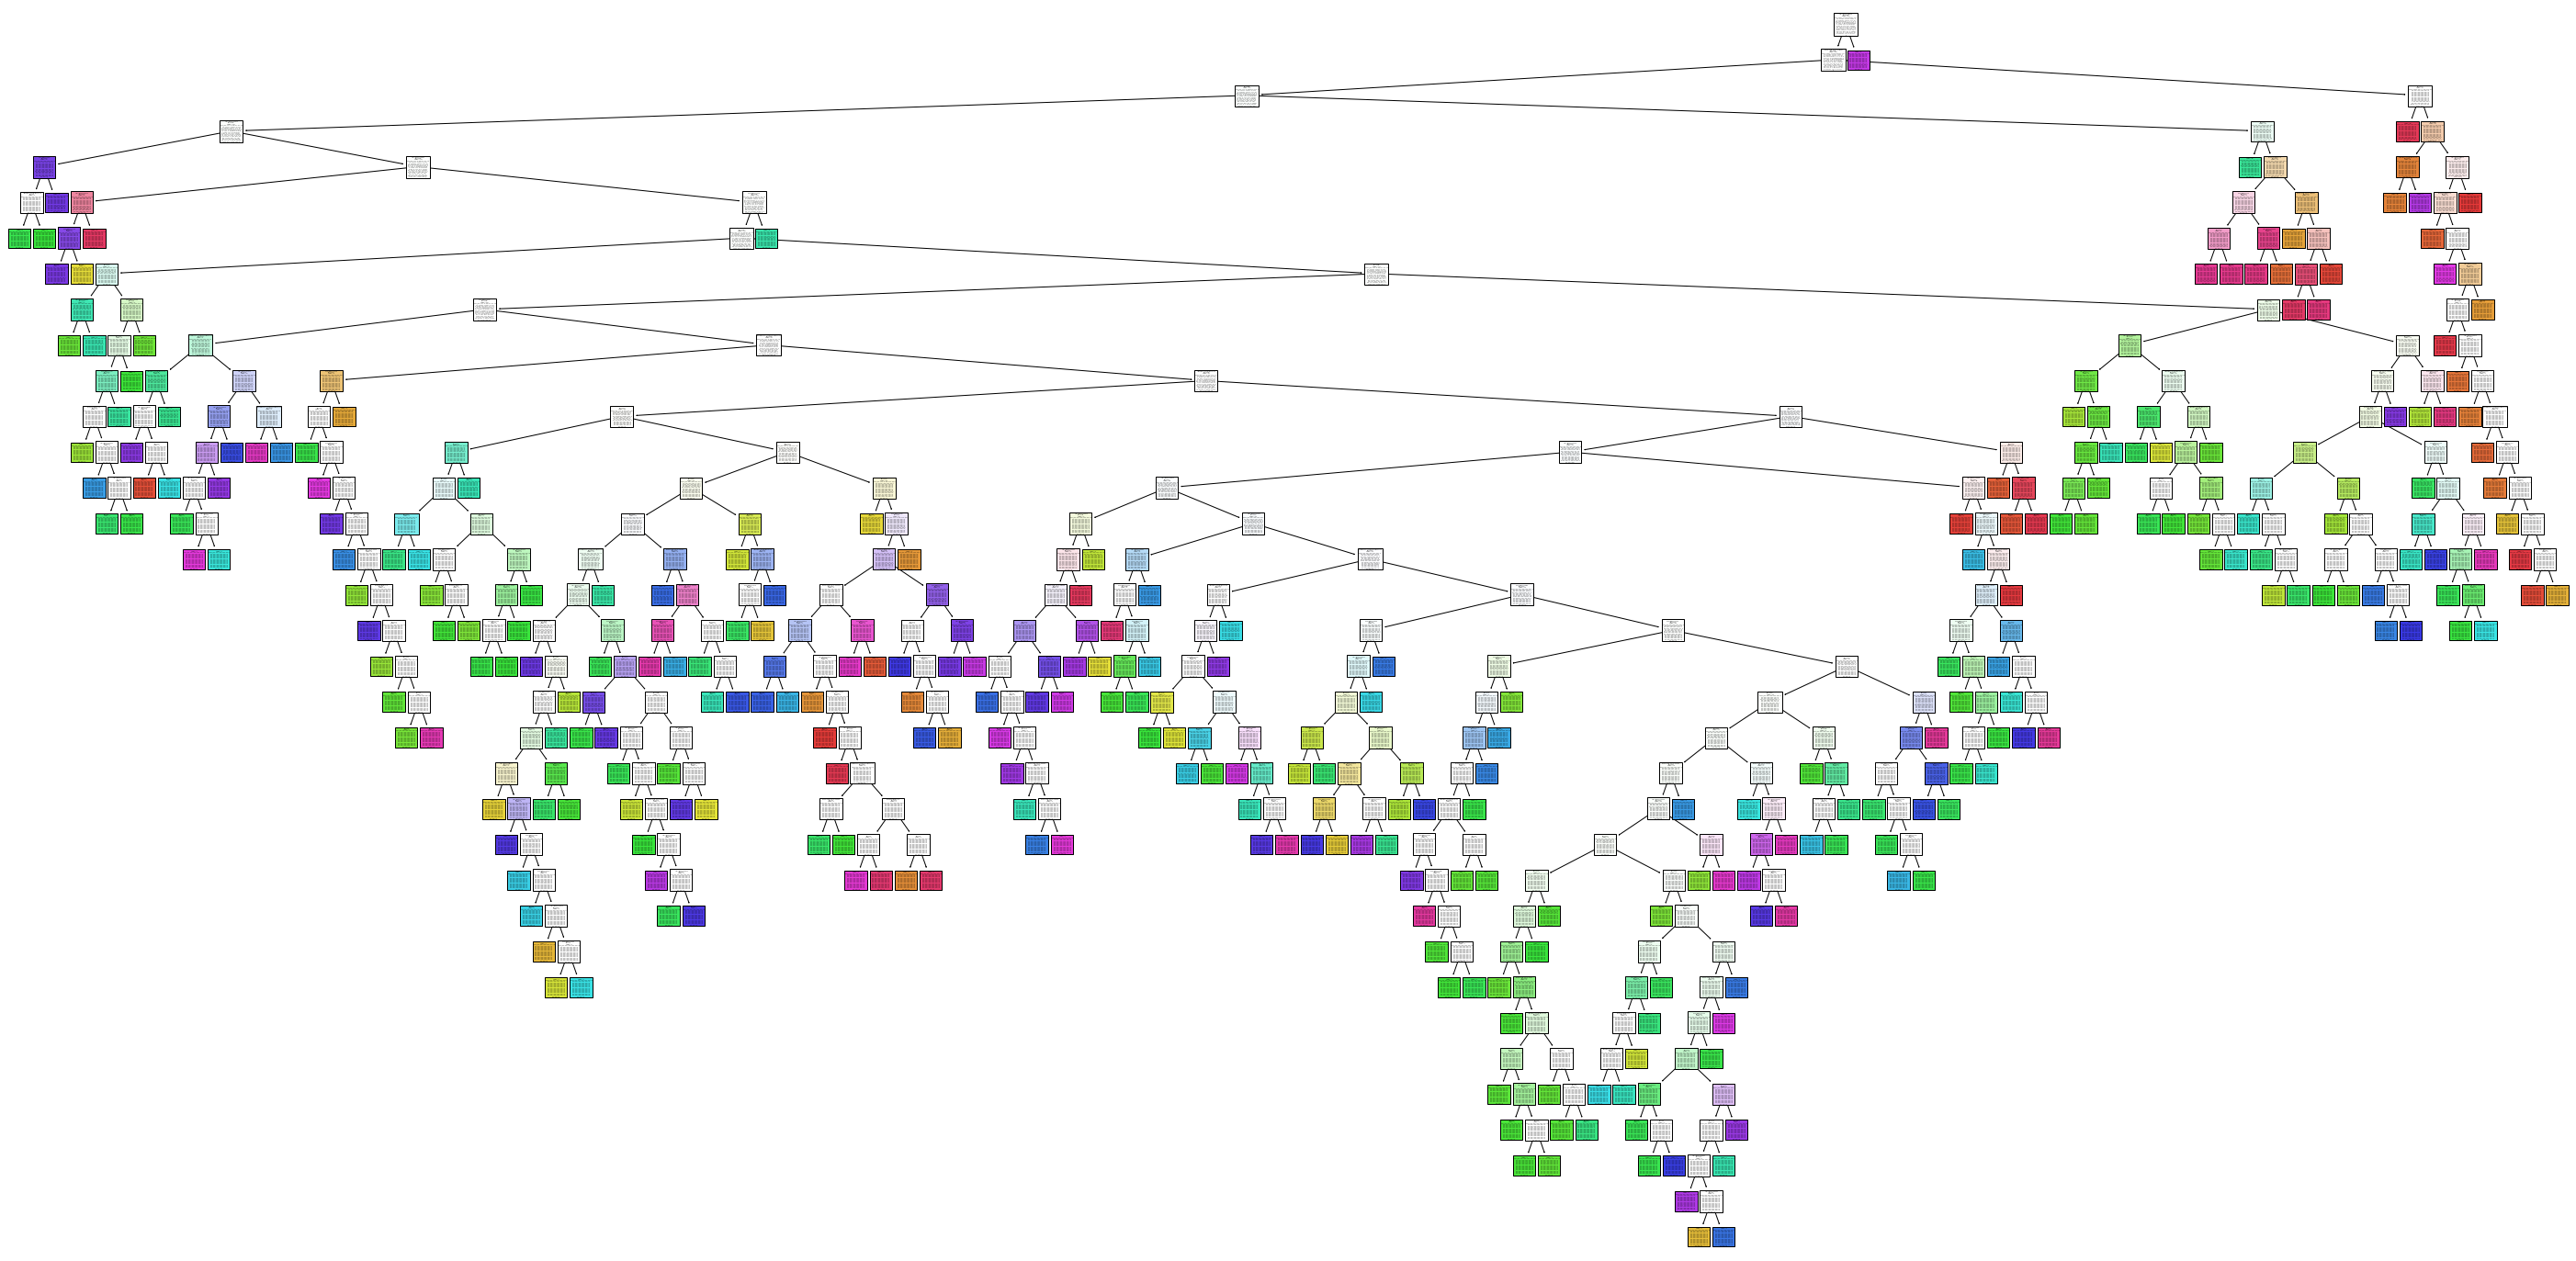

--- Graph Creation = 112.2877550125122 seconds ---
--- Total Time = 112.79853200912476 seconds ---


In [30]:
t_start_time = time.time()

# model = tree.DecisionTreeRegressor(random_state=2020)#, max_leaf_nodes = int(258/8))
model = tree.DecisionTreeClassifier(random_state=2020)#, max_leaf_nodes = 2*len(X.columns))
model = model.fit(X_train, Y_train)
print("Score (Unseen Data)\t", model.score(X_test, Y_test))
print("Depth\t\t\t", model.get_depth())
print("Num leaves\t\t", model.get_n_leaves())
scores = cross_val_score(model, X, Y, cv=10)
print("CV=5 scores\t\t", scores)
print("Avg\t\t\t", sum(scores) / len(scores))

g_start_time = time.time()

fig = plt.figure(figsize= (50, 25))
tree.plot_tree(model,
                   feature_names= X.columns,
                   filled=True)
plt.savefig("../Images/DecisionTreeClassifier_Tree_Plot_Depth_{}.png".format(model.get_depth()))
plt.show()

print("--- Graph Creation = %s seconds ---" % (time.time() - g_start_time))
print("--- Total Time = %s seconds ---" % (time.time() - t_start_time))

# display(X)

# Lets try to change target variable to Job_Outlook_2019-29_Discription

Score (Unseen Data)	 0.8580375782881002
Depth			 10
Num leaves		 12
CV=5 scores		 [0.85416667 0.85       0.825      0.80753138 0.84100418 0.84100418
 0.85355649 0.82426778 0.85355649 0.87029289]
Avg CV score	 0.8420380055788005


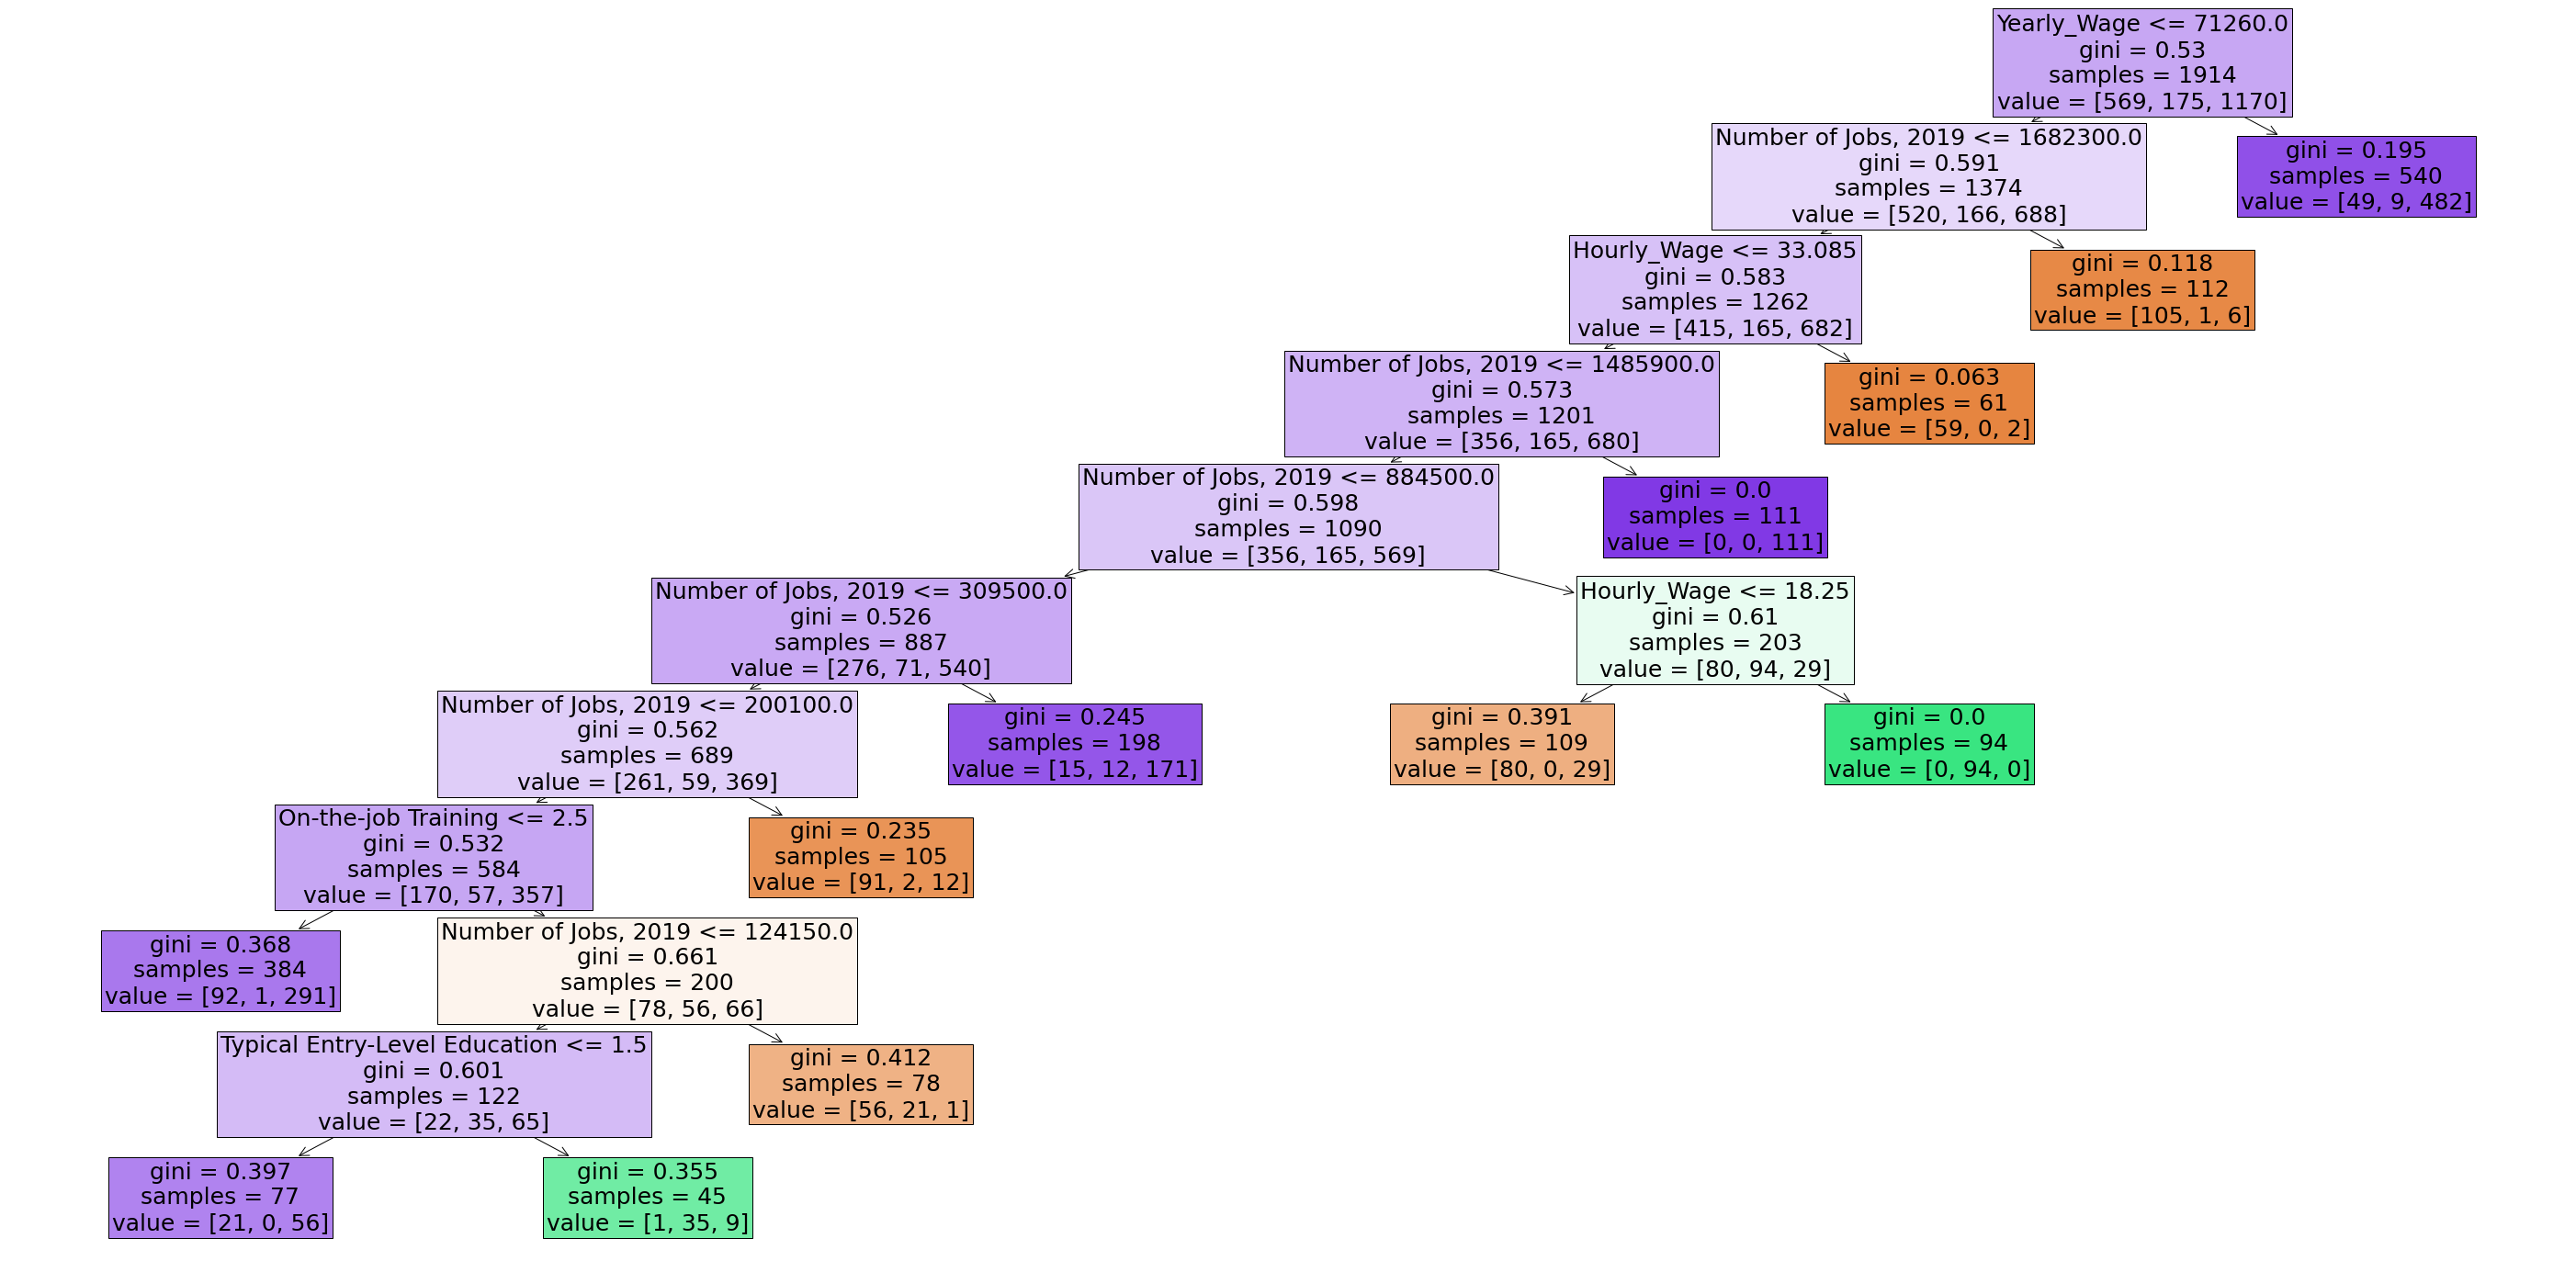

<Figure size 4320x2160 with 0 Axes>

--- Graph Creation = 1.2830920219421387 seconds ---
--- Total Time = 1.4254212379455566 seconds ---


,Typical Entry-Level Education,Work Experience in a Related Occupation,On-the-job Training,"Number of Jobs, 2019",Yearly_Wage,Hourly_Wage
0,2,2,4,51900,48760.0,23.44
1,5,3,0,165200,116720.0,56.11
2,1,3,0,952300,71160.0,34.21
3,7,1,0,190500,95410.0,45.87
4,2,2,2,1643900,36000.0,17.31
...,...,...,...,...,...,...
2388,2,2,1,1465800,35390.0,17.01
2389,1,2,1,1343400,40540.0,19.49
2390,1,2,3,1883700,33710.0,16.21
2391,2,2,1,302100,46500.0,22.35


In [31]:
target = "Job_Outlook_2019-29_Discription"
Y = pd.DataFrame(df[target])

"""
job_outlook_list = [' Decline', ' Slower than average', ' Little or no change', 
                    ' As fast as average', ' Faster than average', ' Much faster than average']
"""

# Redefining target so that is num 
Y.loc[Y["Job_Outlook_2019-29_Discription"]==' Decline', "Job_Outlook_2019-29_Discription"] = -1
Y.loc[Y["Job_Outlook_2019-29_Discription"]==' Slower than average', "Job_Outlook_2019-29_Discription"] = -1
Y.loc[Y["Job_Outlook_2019-29_Discription"]==' Little or no change', "Job_Outlook_2019-29_Discription"] = 0
Y.loc[Y["Job_Outlook_2019-29_Discription"]==' As fast as average', "Job_Outlook_2019-29_Discription"] = 1
Y.loc[Y["Job_Outlook_2019-29_Discription"]==' Faster than average', "Job_Outlook_2019-29_Discription"] = 1
Y.loc[Y["Job_Outlook_2019-29_Discription"]==' Much faster than average', "Job_Outlook_2019-29_Discription"] = 1

Y["Job_Outlook_2019-29_Discription"] = Y["Job_Outlook_2019-29_Discription"].astype(int)


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=2020)

t_start_time = time.time()

model = tree.DecisionTreeClassifier(random_state=2020, max_leaf_nodes=12)#6, max_leaf_nodes = int(258/8))
model = model.fit(X_train, Y_train)
print("Score (Unseen Data)\t", model.score(X_test, Y_test))
print("Depth\t\t\t", model.get_depth())
print("Num leaves\t\t", model.get_n_leaves())
scores = cross_val_score(model, X, Y, cv=10)
print("CV=5 scores\t\t", scores)
print("Avg CV score\t", sum(scores) / len(scores))

g_start_time = time.time()


plt.figure(figsize=(50,25))
tree.plot_tree(model,
               feature_names= X.columns,
               filled=True,
               fontsize=25)
plt.figure(figsize=(60,30))
plt.show()

print("--- Graph Creation = %s seconds ---" % (time.time() - g_start_time))
print("--- Total Time = %s seconds ---" % (time.time() - t_start_time))

display(X)

Score (Unseen Data)	 0.9561586638830898
depth_scores[30] = 0.9611375149132586
Score (Unseen Data)	 0.9561586638830898
depth_scores[29] = 0.9611375149132586
Score (Unseen Data)	 0.9561586638830898
depth_scores[28] = 0.9611375149132586
Score (Unseen Data)	 0.9561586638830898
depth_scores[27] = 0.9611375149132586
Score (Unseen Data)	 0.9561586638830898
depth_scores[26] = 0.9611375149132586
Score (Unseen Data)	 0.9561586638830898
depth_scores[25] = 0.9611375149132586
Score (Unseen Data)	 0.9561586638830898
depth_scores[24] = 0.9611375149132586
Score (Unseen Data)	 0.9561586638830898
depth_scores[23] = 0.9611375149132586
Score (Unseen Data)	 0.9561586638830898
depth_scores[22] = 0.9611375149132586
Score (Unseen Data)	 0.9561586638830898
depth_scores[21] = 0.9611375149132586
Score (Unseen Data)	 0.9561586638830898
depth_scores[20] = 0.9611375149132586
Score (Unseen Data)	 0.9561586638830898
depth_scores[19] = 0.9611375149132586
Score (Unseen Data)	 0.9561586638830898
depth_scores[18] = 0.961

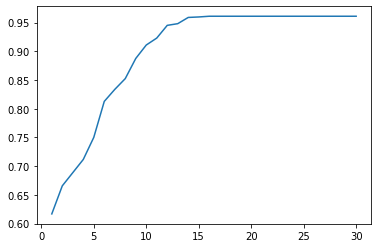

--- Total Time = 1.4250907897949219 seconds ---


In [32]:
start_time = time.time()

# Max Nodes
# for i in range(250, 0, -25):
#     print(i)

# Max Depth
depth_scores = {}
for i in range(30, 0, -1):
    model = tree.DecisionTreeClassifier(random_state=2020, max_depth=i)#, max_leaf_nodes = int(258/8))
    model = model.fit(X_train, Y_train)

    scores = cross_val_score(model, X, Y, cv=2)
    
    print("Score (Unseen Data)\t", model.score(X_test, Y_test))
    depth_scores[i] = sum(scores) / len(scores)

    print("depth_scores[{}] = {}".format(i, depth_scores[i]))

    # g_start_time = time.time()

    # fig = plt.figure()#figsize= (15, 5))
    # tree.plot_tree(model,
    #                    feature_names= X.columns,
    #                    filled=True)
    # plt.show()


    # print("--- Graph Creation = %s seconds ---" % (time.time() - g_start_time))
    
depth_scores_sorted = sorted(depth_scores.items()) # sorted by key, return a list of tuples

depth, score = zip(*depth_scores_sorted) # unpack a list of pairs into two tuples

plt.plot(depth, score)
plt.show()
    
print("--- Total Time = %s seconds ---" % (time.time() - start_time))

# After Learning more about Trees in Class Review

In [69]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

# model = tree.DecisionTreeRegressor(random_state=2020)#, max_leaf_nodes = 2*len(X.columns))
model = tree.DecisionTreeClassifier(random_state=2020)#, max_leaf_nodes = 2*len(X.columns))

# Searching for best Model
num_features = len(X_train.columns)
grid = {"max_leaf_nodes": [num_features, num_features**2, num_features**3, num_features**4],
        "max_depth": [num_features, num_features*2, num_features*3, num_features*4, num_features*5, num_features*6]}
grid_search_cv = GridSearchCV(estimator = model, 
                              param_grid = grid, 
                              cv = 10, 
                              return_train_score = True, 
                              verbose = 2)

# print(model.get_params().keys())
grid_search_cv.fit(X_train, Y_train)

pd.DataFrame(grid_search_cv.cv_results_ ).sort_values(by=["mean_test_score", "std_test_score"], ascending = False).T

Fitting 10 folds for each of 24 candidates, totalling 240 fits
[CV] max_depth=6, max_leaf_nodes=6 ...................................
[CV] .................... max_depth=6, max_leaf_nodes=6, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=6 ...................................
[CV] .................... max_depth=6, max_leaf_nodes=6, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=6 ...................................
[CV] .................... max_depth=6, max_leaf_nodes=6, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=6 ...................................
[CV] .................... max_depth=6, max_leaf_nodes=6, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=6 ...................................
[CV] .................... max_depth=6, max_leaf_nodes=6, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=6 ...................................
[CV] .................... max_depth=6, max_leaf_nodes=6, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=6 ...................................
[CV] .........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .................... max_depth=6, max_leaf_nodes=6, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=6 ...................................
[CV] .................... max_depth=6, max_leaf_nodes=6, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=36 ..................................
[CV] ................... max_depth=6, max_leaf_nodes=36, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=36 ..................................
[CV] ................... max_depth=6, max_leaf_nodes=36, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=36 ..................................
[CV] ................... max_depth=6, max_leaf_nodes=36, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=36 ..................................
[CV] ................... max_depth=6, max_leaf_nodes=36, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=36 ..................................
[CV] ................... max_depth=6, max_leaf_nodes=36, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=36 ..................................
[CV] .

[CV] ................ max_depth=12, max_leaf_nodes=1296, total=   0.0s
[CV] max_depth=12, max_leaf_nodes=1296 ...............................
[CV] ................ max_depth=12, max_leaf_nodes=1296, total=   0.0s
[CV] max_depth=12, max_leaf_nodes=1296 ...............................
[CV] ................ max_depth=12, max_leaf_nodes=1296, total=   0.0s
[CV] max_depth=18, max_leaf_nodes=6 ..................................
[CV] ................... max_depth=18, max_leaf_nodes=6, total=   0.0s
[CV] max_depth=18, max_leaf_nodes=6 ..................................
[CV] ................... max_depth=18, max_leaf_nodes=6, total=   0.0s
[CV] max_depth=18, max_leaf_nodes=6 ..................................
[CV] ................... max_depth=18, max_leaf_nodes=6, total=   0.0s
[CV] max_depth=18, max_leaf_nodes=6 ..................................
[CV] ................... max_depth=18, max_leaf_nodes=6, total=   0.0s
[CV] max_depth=18, max_leaf_nodes=6 ..................................
[CV] .

[CV] ................. max_depth=24, max_leaf_nodes=216, total=   0.0s
[CV] max_depth=24, max_leaf_nodes=216 ................................
[CV] ................. max_depth=24, max_leaf_nodes=216, total=   0.0s
[CV] max_depth=24, max_leaf_nodes=216 ................................
[CV] ................. max_depth=24, max_leaf_nodes=216, total=   0.0s
[CV] max_depth=24, max_leaf_nodes=216 ................................
[CV] ................. max_depth=24, max_leaf_nodes=216, total=   0.0s
[CV] max_depth=24, max_leaf_nodes=1296 ...............................
[CV] ................ max_depth=24, max_leaf_nodes=1296, total=   0.0s
[CV] max_depth=24, max_leaf_nodes=1296 ...............................
[CV] ................ max_depth=24, max_leaf_nodes=1296, total=   0.0s
[CV] max_depth=24, max_leaf_nodes=1296 ...............................
[CV] ................ max_depth=24, max_leaf_nodes=1296, total=   0.0s
[CV] max_depth=24, max_leaf_nodes=1296 ...............................
[CV] .

[CV] ................... max_depth=36, max_leaf_nodes=6, total=   0.0s
[CV] max_depth=36, max_leaf_nodes=36 .................................
[CV] .................. max_depth=36, max_leaf_nodes=36, total=   0.0s
[CV] max_depth=36, max_leaf_nodes=36 .................................
[CV] .................. max_depth=36, max_leaf_nodes=36, total=   0.0s
[CV] max_depth=36, max_leaf_nodes=36 .................................
[CV] .................. max_depth=36, max_leaf_nodes=36, total=   0.0s
[CV] max_depth=36, max_leaf_nodes=36 .................................
[CV] .................. max_depth=36, max_leaf_nodes=36, total=   0.0s
[CV] max_depth=36, max_leaf_nodes=36 .................................
[CV] .................. max_depth=36, max_leaf_nodes=36, total=   0.0s
[CV] max_depth=36, max_leaf_nodes=36 .................................
[CV] .................. max_depth=36, max_leaf_nodes=36, total=   0.0s
[CV] max_depth=36, max_leaf_nodes=36 .................................
[CV] .

[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:    3.3s finished


,10,11,14,15,18,19,22,23,6,7,...,5,1,2,3,0,4,8,12,16,20
mean_fit_time,0.00704412,0.0075876,0.00866153,0.008746,0.00733464,0.0081115,0.00815725,0.0074508,0.00851007,0.00981555,...,0.00895746,0.0108232,0.011176,0.00899727,0.014338,0.00636635,0.00771945,0.00630021,0.00914757,0.00688584
std_fit_time,0.000453079,0.000740246,0.00146964,0.000689777,0.000337065,0.000587929,0.00173197,0.000802128,0.00169713,0.00163153,...,0.00189284,0.00497317,0.00426042,0.00133568,0.00827686,0.000593572,0.00106205,0.000512961,0.00163502,0.000515682
mean_score_time,0.00161624,0.00182776,0.00242546,0.00218995,0.00178199,0.00212886,0.00183802,0.00180702,0.00218487,0.00230076,...,0.00229521,0.00267346,0.0026319,0.00227466,0.00310152,0.00182419,0.0021522,0.00161254,0.00230081,0.00214016
std_score_time,0.000110195,0.000217638,0.000904635,0.000345688,0.000154689,0.000407756,0.000253706,0.000265139,0.000551036,0.000313262,...,0.000693254,0.00101117,0.000689178,0.000275451,0.000831744,0.000264126,0.000393789,0.000110707,0.000298468,0.000514197
param_max_depth,18,18,24,24,30,30,36,36,12,12,...,12,6,6,6,6,12,18,24,30,36
param_max_leaf_nodes,216,1296,216,1296,216,1296,216,1296,216,1296,...,36,36,216,1296,6,6,6,6,6,6
params,"{'max_depth': 18, 'max_leaf_nodes': 216}","{'max_depth': 18, 'max_leaf_nodes': 1296}","{'max_depth': 24, 'max_leaf_nodes': 216}","{'max_depth': 24, 'max_leaf_nodes': 1296}","{'max_depth': 30, 'max_leaf_nodes': 216}","{'max_depth': 30, 'max_leaf_nodes': 1296}","{'max_depth': 36, 'max_leaf_nodes': 216}","{'max_depth': 36, 'max_leaf_nodes': 1296}","{'max_depth': 12, 'max_leaf_nodes': 216}","{'max_depth': 12, 'max_leaf_nodes': 1296}",...,"{'max_depth': 12, 'max_leaf_nodes': 36}","{'max_depth': 6, 'max_leaf_nodes': 36}","{'max_depth': 6, 'max_leaf_nodes': 216}","{'max_depth': 6, 'max_leaf_nodes': 1296}","{'max_depth': 6, 'max_leaf_nodes': 6}","{'max_depth': 12, 'max_leaf_nodes': 6}","{'max_depth': 18, 'max_leaf_nodes': 6}","{'max_depth': 24, 'max_leaf_nodes': 6}","{'max_depth': 30, 'max_leaf_nodes': 6}","{'max_depth': 36, 'max_leaf_nodes': 6}"
split0_test_score,0.979167,0.979167,0.979167,0.979167,0.979167,0.979167,0.979167,0.979167,0.942708,0.942708,...,0.927083,0.84375,0.84375,0.84375,0.770833,0.770833,0.770833,0.770833,0.770833,0.770833
split1_test_score,0.958333,0.958333,0.958333,0.958333,0.958333,0.958333,0.958333,0.958333,0.947917,0.947917,...,0.942708,0.776042,0.776042,0.776042,0.713542,0.713542,0.713542,0.713542,0.713542,0.713542
split2_test_score,0.963542,0.963542,0.963542,0.963542,0.963542,0.963542,0.963542,0.963542,0.963542,0.963542,...,0.932292,0.791667,0.791667,0.791667,0.723958,0.723958,0.723958,0.723958,0.723958,0.723958


In [41]:
cv_fivefold['test_score']

array([0.8389456 , 0.80162398, 0.9116478 , 0.81890936, 0.83310508])

# Based on grid seach above

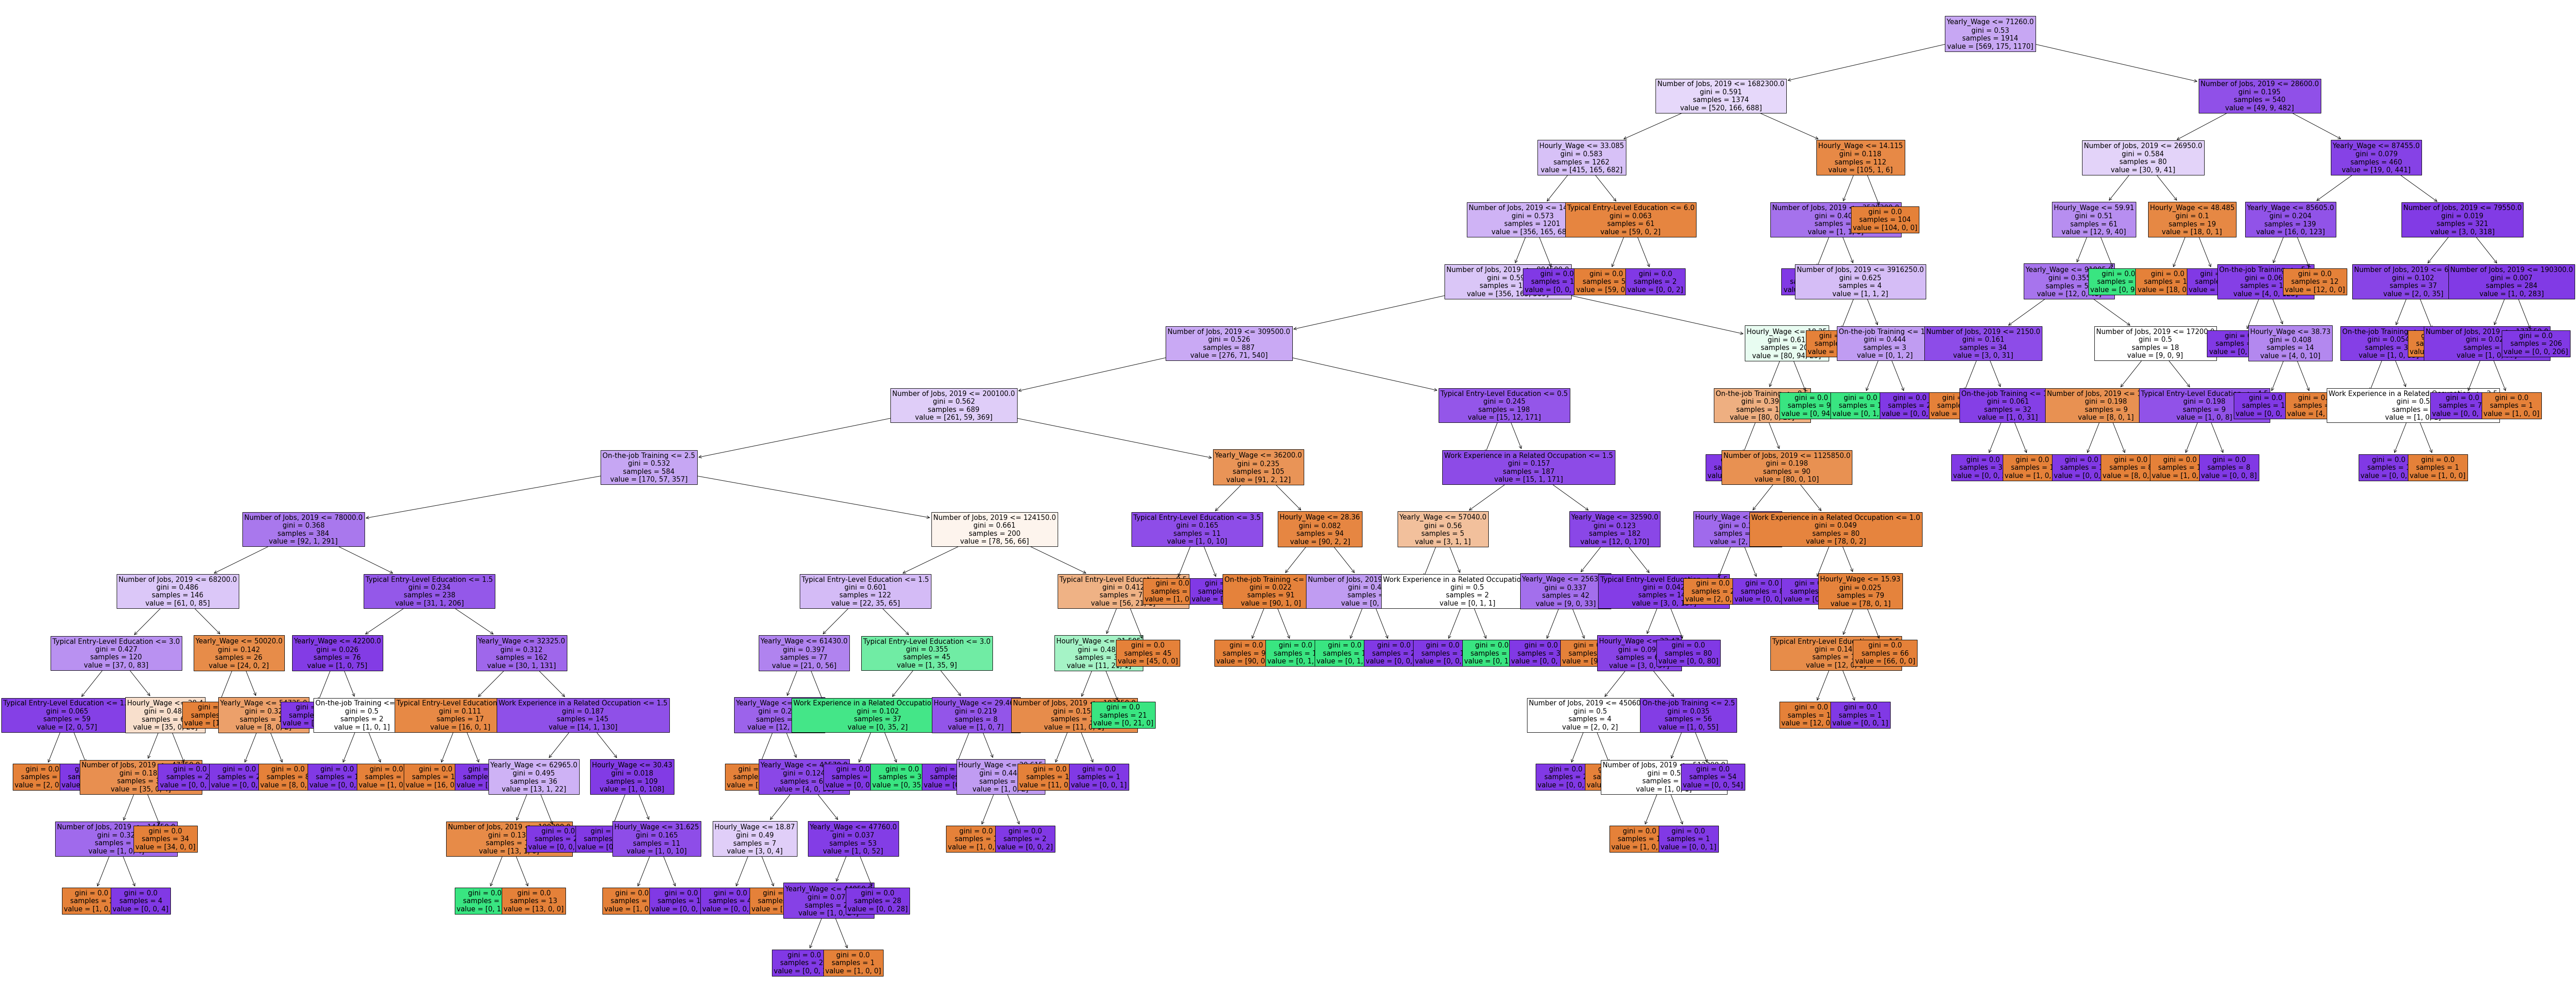

Avg CV score	 0.9660397074190178
15 91


In [68]:
model = tree.DecisionTreeClassifier(random_state=2020,
                                    max_depth=18,
                                    max_leaf_nodes = 216)
model = model.fit(X_train, Y_train)

plt.figure(figsize=(100,40))
tree.plot_tree(model,
               feature_names= X.columns,
               filled=True,
               fontsize=15)
# plt.figure(figsize=(60,30))

plt.savefig("../Images/Final_DecisionTreeClassifier_Tree_Plot_Max-Depth_{}_Max-Leaf-Nodes_{}.png".format(model.get_depth(), model.get_n_leaves()))
plt.show()

scores = cross_val_score(model, X_train, Y_train, cv=6)
print("Avg CV score\t", sum(scores) / len(scores))
print(model.get_depth(), model.get_n_leaves())